<a href="https://colab.research.google.com/github/JoanMR-dev/Data-Analyst/blob/main/Analisis%20Exploratorio%20de%20Datos/AED_decidir_salarios_proximos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANALISIS DE BASE DE DATOS - SALARIOS**

Se realizara una exploracion a una base de datos de salarios la cual contiene:



1.  work_year: Año en que se pagó el salario.
2.  experience_level: Nivel de experiencia en el trabajo durante el año con los siguientes valores posibles: EN Nivel de entrada / Junior MI Nivel medio / intermedio SE Nivel senior / experto EX Nivel ejecutivo / Director.
3.  employment_type: Tipo de empleo para el rol: PT Tiempo parcial / FT Tiempo completo / CT Contrato / FL Freelance.
4. job_title: La función que se ha desempeñado durante el año.
5. salary: El importe total del salario bruto pagado.
6. salary_currency: La moneda del salario pagado.
7. salaryinusd: El salario en USD (tipo de cambio dividido por el tipo de cambio medio en USD para el año respectivo a través de fxdata.foorilla.com).
8. employee_residence: País principal de residencia del empleado durante el año laboral como código de país ISO 3166.
9. remote_ratio: Cantidad total de trabajo realizado a distancia, los valores posibles son los siguientes: 0 Sin trabajo a distancia (menos del 20%), 50 Parcialmente a distancia, 100 Totalmente a distancia (más del 80%)
10. company_location El país de la oficina principal del empleador o de la sucursal contratante como código de país ISO 3166.
11. company_size El número medio de personas que han trabajado para la empresa durante el año: S menos de 50 empleados (pequeña), M de 50 a 250 empleados (mediana), L más de 250 empleados (grande).



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
import warnings
import os
import random

In [3]:
%matplotlib inline
warnings.filterwarnings("ignore")
sns.set_style("dark")
sns.set_context("paper",font_scale=1.7)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
salaries_df = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/DATASETS/ds_salaries/ds_salaries.csv', error_bad_lines = False)
salaries_df= salaries_df.drop(salaries_df.columns[0], axis = 1)
salaries_df.head(4)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S


In [9]:
salaries_df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [10]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [11]:
sns.set_palette("plasma")

**Analisis Univariado**

No se tiene en cuenta la característica del salario, ya que consiste en diferentes salarios en diferentes monedas. Sólo nos basamos en el salario en USD ya que será una mejor estimación en la distribución del salario debido a la comparación generalizada.



***Graficos de distribución.***

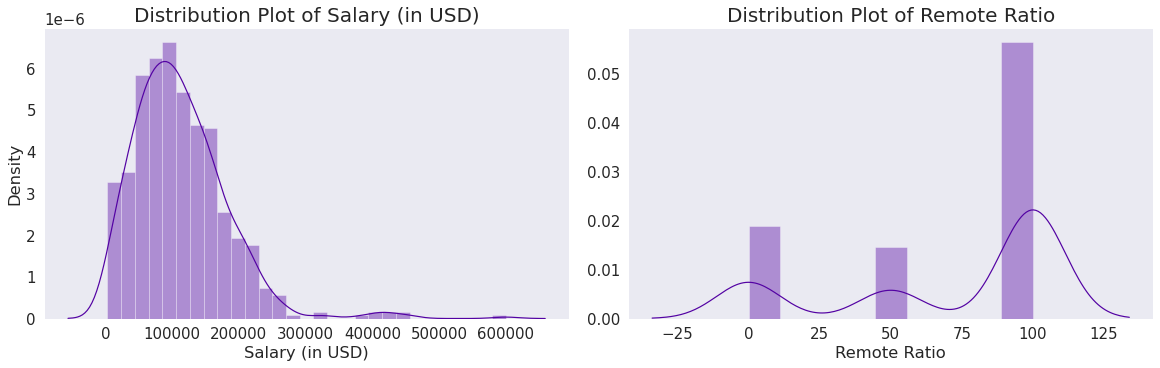

In [16]:
def plot_distribution():
    dimensions_item = (8, 5)
    numerical_variables = ["salary_in_usd", "remote_ratio"]
    numerical_actual_value = ["Salary (in USD)", "Remote Ratio"]
    nrow = 1
    ncol = len(numerical_variables)
    fig, axes = plt.subplots(nrow, ncol, constrained_layout=True, figsize=(dimensions_item[0] * ncol, dimensions_item[1] * nrow))
    for i in range(nrow):
        for j in range(ncol):
            x = j
            sns.distplot(a=salaries_df[numerical_variables[x]].values, ax=axes[j])
            axes[j].set_xlabel(numerical_actual_value[x])
            axes[j].set_ylabel("Density" if j == 0 else "")
            axes[j].set_title(f"Distribution Plot of {numerical_actual_value[x]}", fontdict={"fontsize": 20})
plot_distribution()

**Conclusion de los graficos.**


1.   La mayor concentración positiva de los datos se encuentra en el rango de 0 a 250k, lo que indica que los salarios se centraron en tal intervalo.
2.   En el Remote Ratio se puede inferir que, la mayor concentracion esta en el 100%, por lo cual se describe que la mayoria de trabajos fueron remotos.



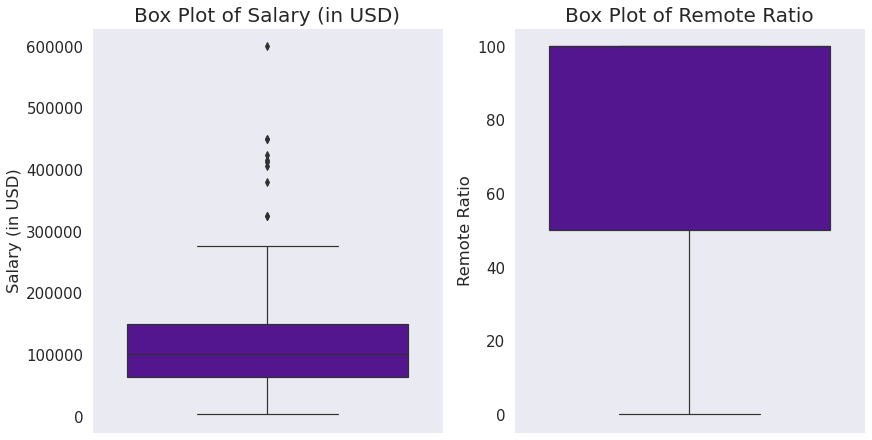

In [18]:
def box_plot():
    dimensions_item = (6, 6)
    numerical_variables = ["salary_in_usd", "remote_ratio"]
    numerical_actual_value = ["Salary (in USD)", "Remote Ratio"]
    nrow = 1
    ncol = len(numerical_variables)
    fig, axes = plt.subplots(nrow, ncol, constrained_layout=True, figsize=(dimensions_item[0] * ncol, dimensions_item[1] * nrow))
    for i in range(nrow):
        for j in range(ncol):
            x = j
            sns.boxplot(y=numerical_variables[x], data = salaries_df, ax=axes[j])
            axes[j].set_ylabel(numerical_actual_value[x])
            axes[j].set_title(f"Box Plot of {numerical_actual_value[x]}", fontdict={"fontsize": 20})
box_plot()

**Conclusion del grafico de caja y bigotes.**

1. El primer grafico muestra que los salarios son elevados. Teninendo valores atípicos que muestran un alcance hasta de 600.000 USD.
2. Hay un sesgo del Remote Ratio hasta mas del 50%.



***Rasgos Categoricos.***

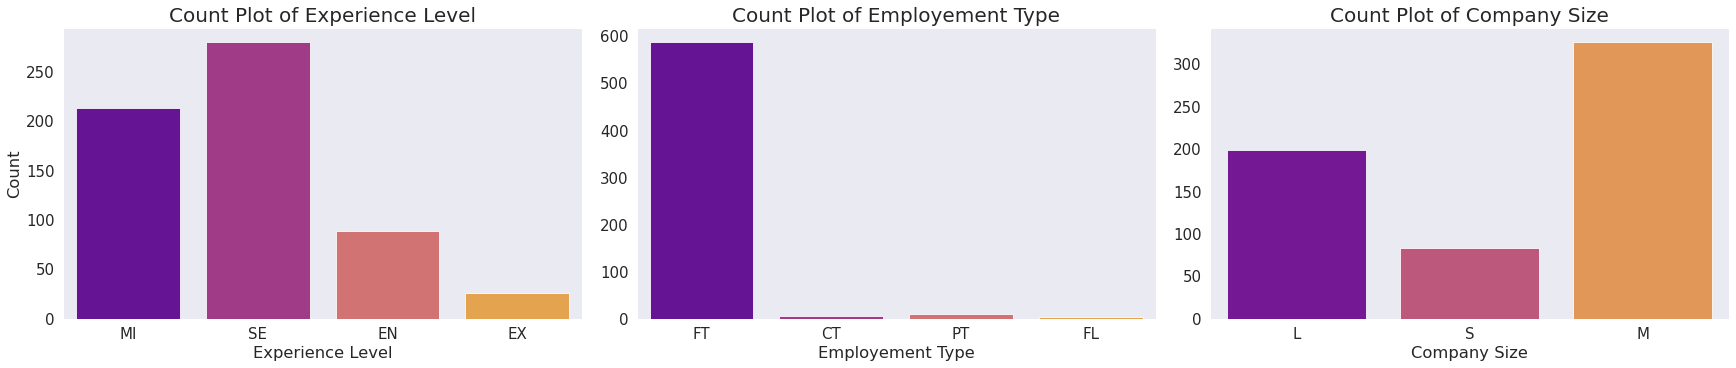

In [19]:
def count_plot(single_item_dimensions, categorical_variables, categorical_actual_value, nrow, ncol):
    fig, axes = plt.subplots(nrow, ncol, constrained_layout=True, figsize=(single_item_dimensions[0] * ncol, single_item_dimensions[1] * nrow))
    for i in range(nrow):
        for j in range(ncol):
            x = j
            sns.countplot(x=categorical_variables[x], data = salaries_df, ax=axes[j], palette="plasma")
            axes[j].set_xlabel(categorical_actual_value[x])
            axes[j].set_ylabel("Count" if j == 0 else "")
            axes[j].set_title(f"Count Plot of {categorical_actual_value[x]}", fontdict={"fontsize": 20})

categorical_variables = ["experience_level", "employment_type", "company_size"]
count_plot(single_item_dimensions = (8, 5), 
                categorical_variables = categorical_variables, 
                categorical_actual_value = ["Experience Level", "Employement Type", "Company Size"], 
                nrow = 1,
                ncol = len(categorical_variables))

**Conclusión de las variables categoricas.**

1. La mayoria de oportunidades se encuentran en el nivel medio junior y senior.( niveles de experiencia).
2. En el tipo de empleo la mayoria se encuentran fulltime, y unos pocos en las otras categorias.
3. En el tamaño de empresa, la mayor concentracion se encuentran en mediana empresa y grande.


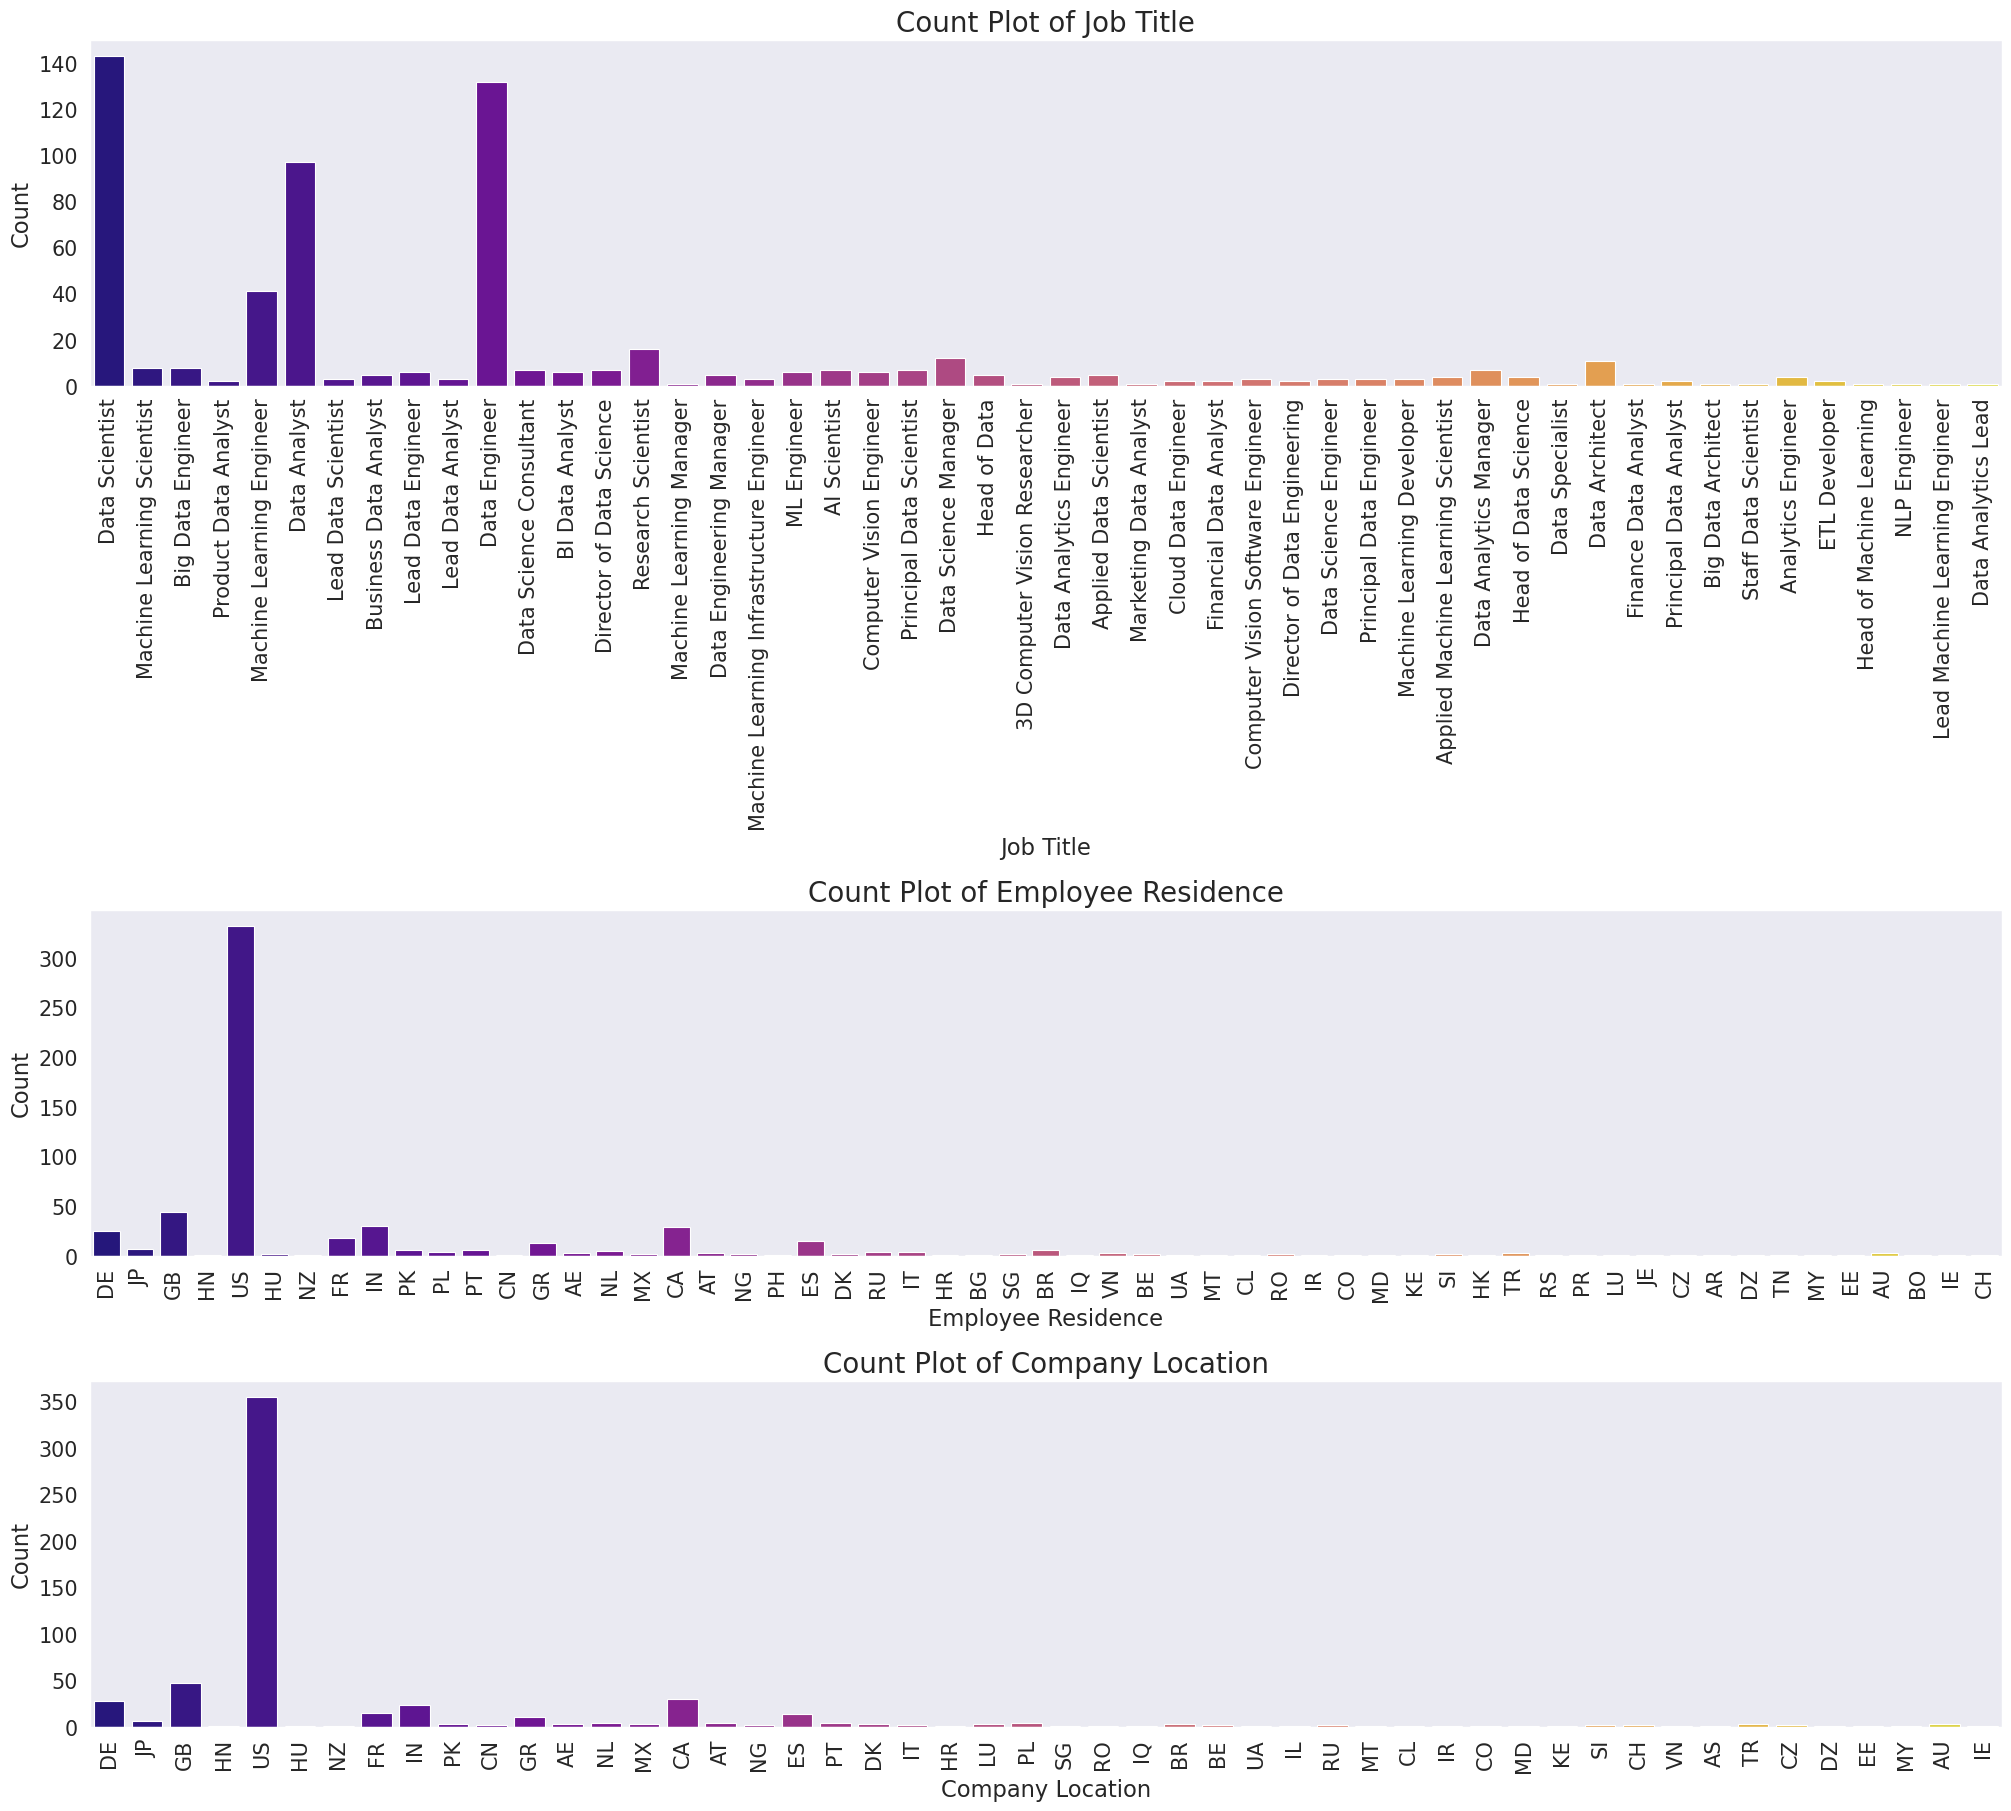

In [22]:
def count_plot2(single_item_dimensions, categorical_variables, categorical_actual_value, nrow, ncol):
    fig, axes = plt.subplots(nrow, ncol, figsize=(single_item_dimensions[0] * ncol, single_item_dimensions[1] * nrow), dpi=100, constrained_layout=True)
    for i in range(nrow):
        for j in range(ncol):
            x = i
            sns.countplot(x=categorical_variables[x], data = salaries_df, ax=axes[i], palette="plasma")
            axes[i].set_xlabel(categorical_actual_value[x])
            axes[i].set_ylabel("Count")
            axes[i].set_title(f"Count Plot of {categorical_actual_value[x]}", fontdict={"fontsize": 20})
            axes[i].set_xticklabels(axes[i].get_xticklabels(), fontsize=15)
            plt.setp(axes[i].get_xticklabels(), rotation=90)

categorical_variables = ["job_title", "employee_residence", "company_location"]
count_plot2(single_item_dimensions = (20, 6), 
                categorical_variables = categorical_variables, 
                categorical_actual_value = ["Job Title", "Employee Residence", "Company Location"], 
                nrow = 3,
                ncol = 1)

Conclusion de las variables categoricas.

1. En el primer grafico se observa que la inclinación es hacia data scientist, data engineering y data analyst. Las otras categorias no muestran información significante.
2. El pais con mayor presencia es US, lo que indicaria que la mayoria de empleados estan alli.
3. La mayoria de las locaciones de las empresas se encuentran en EEUU, lo que responderia a la conclusión de porque la mayor presencia esta alli.


***Grafico circular.***

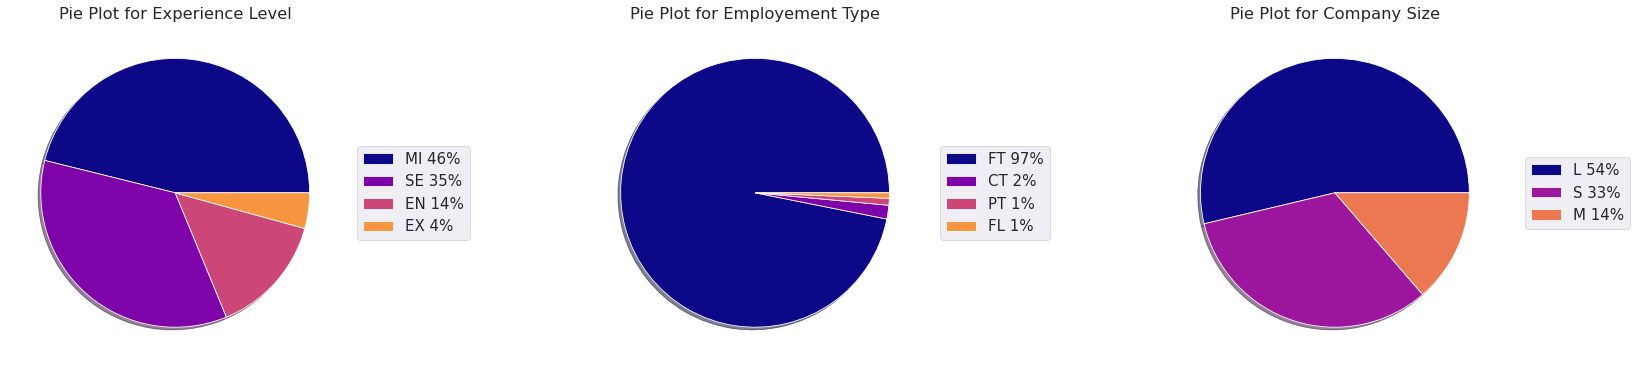

In [23]:
def pie_plot(single_item_dimensions, categorical_variables, categorical_actual_value, nrow, ncol):
    fig, axes = plt.subplots(nrow, ncol, constrained_layout=True, figsize=(single_item_dimensions[0] * ncol, single_item_dimensions[1] * nrow))
    for i in range(nrow):
        for j in range(ncol):
            x = j
            theme = plt.get_cmap('plasma')
            axes[j].set_prop_cycle("color", [theme(1. * i / len(salaries_df[categorical_variables[x]].unique()))
                             for i in range(len(salaries_df[categorical_variables[x]].unique()))])
            wedges, texts, autotexts = axes[j].pie(salaries_df[categorical_variables[x]].value_counts(), labels=salaries_df[categorical_variables[x]].unique(), shadow=True, startangle=0, autopct='%1.0f%%', textprops={"color": "white", "alpha": 0})
            axes[j].legend(loc="right", bbox_to_anchor=[1, 0, 0.4, 1], labels=[f"{x[0].get_text()} {x[1].get_text()}" for x in zip(texts, autotexts)])
            axes[j].set_title(f"Pie Plot for {categorical_actual_value[x]}")

categorical_variables = ["experience_level", "employment_type", "company_size"]
pie_plot(single_item_dimensions = (8, 5), 
                categorical_variables = categorical_variables, 
                categorical_actual_value = ["Experience Level", "Employement Type", "Company Size"], 
                nrow = 1,
                ncol = len(categorical_variables))

**Conclusion de los graficos circulares.**

1. Segun el primer grafico la mayor concentración de experiencia laboral se encuentra en el nivel medio y senior, teniendo el 81%.
2. En el tipo de empleo se concluye que la mayoria es full time.
3. En el tamaño de la compañia predomina las grandes y pequeñas.

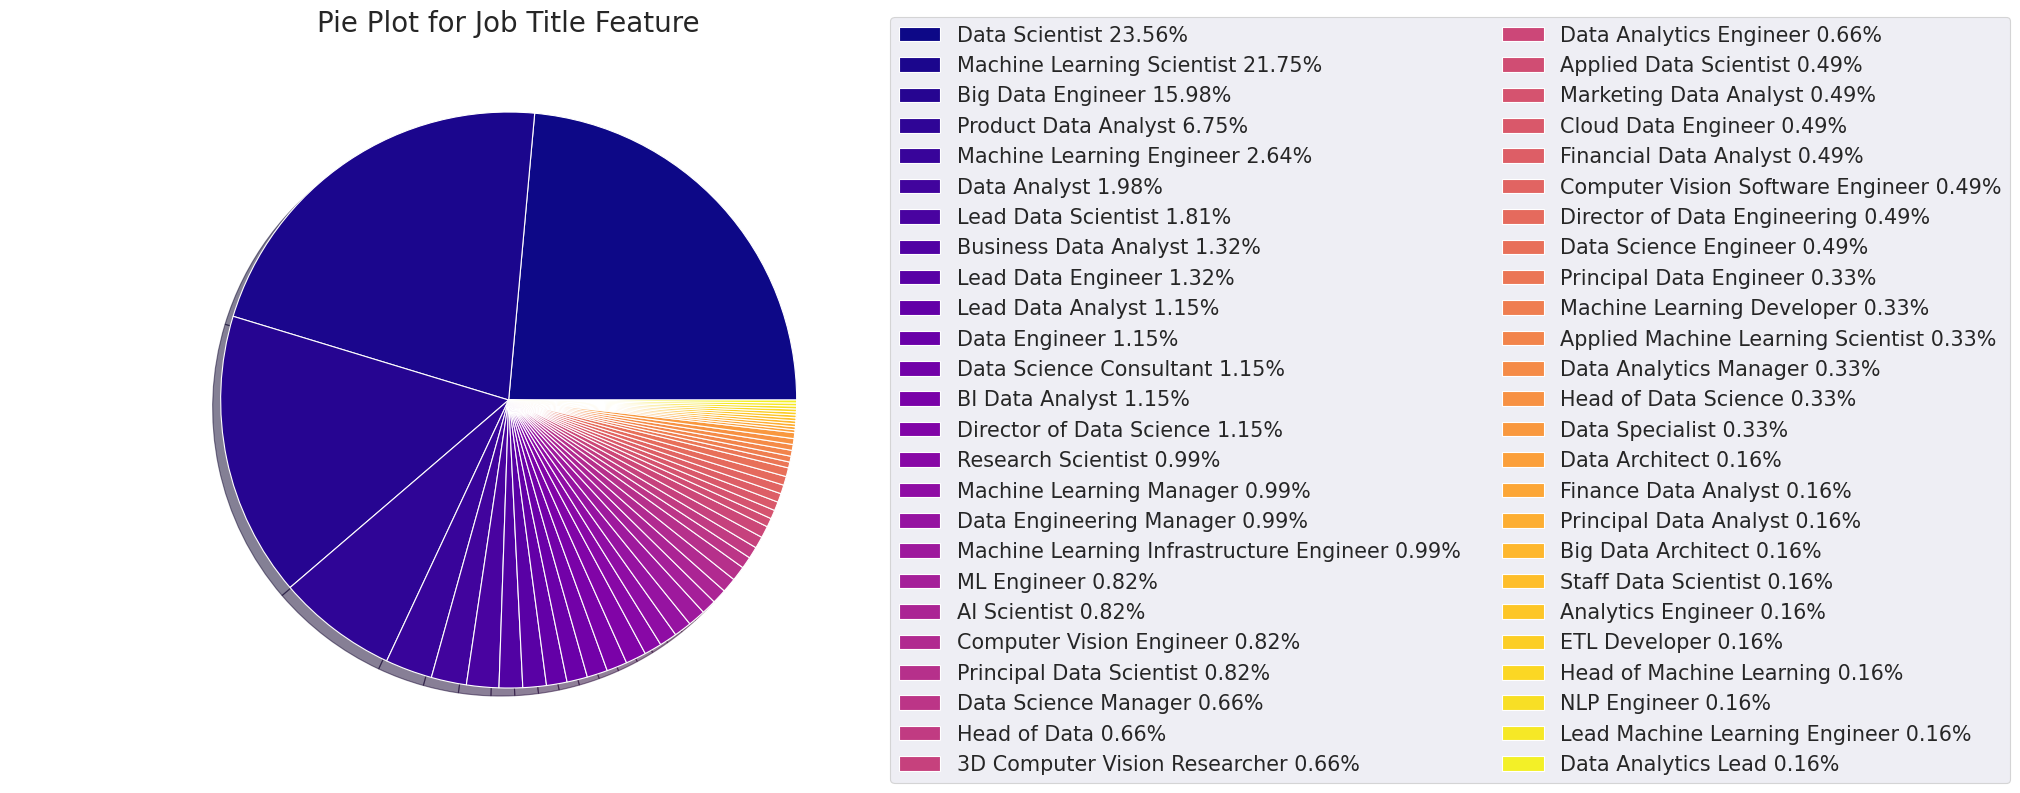

In [24]:
fig = plt.figure(figsize=(10, 8), dpi = 100)
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])
theme = plt.get_cmap('plasma')
axes.set_prop_cycle("color", [theme(1. * i / len(salaries_df["job_title"].unique()))
                             for i in range(len(salaries_df["job_title"].unique()))])
wedges, texts, autotexts = plt.pie(salaries_df["job_title"].value_counts(), labels=salaries_df["job_title"].unique(), shadow=True, startangle=0, autopct='%1.2f%%', textprops={"color": "white", "alpha": 0})
plt.legend(loc="right", bbox_to_anchor=[1, 0, 1.6, 1], ncol=2, labels=[f"{x[0].get_text()} {x[1].get_text()}" for x in zip(texts, autotexts)])
axes.set_title("Pie Plot for Job Title Feature", fontdict={"fontsize": 20})
plt.show()

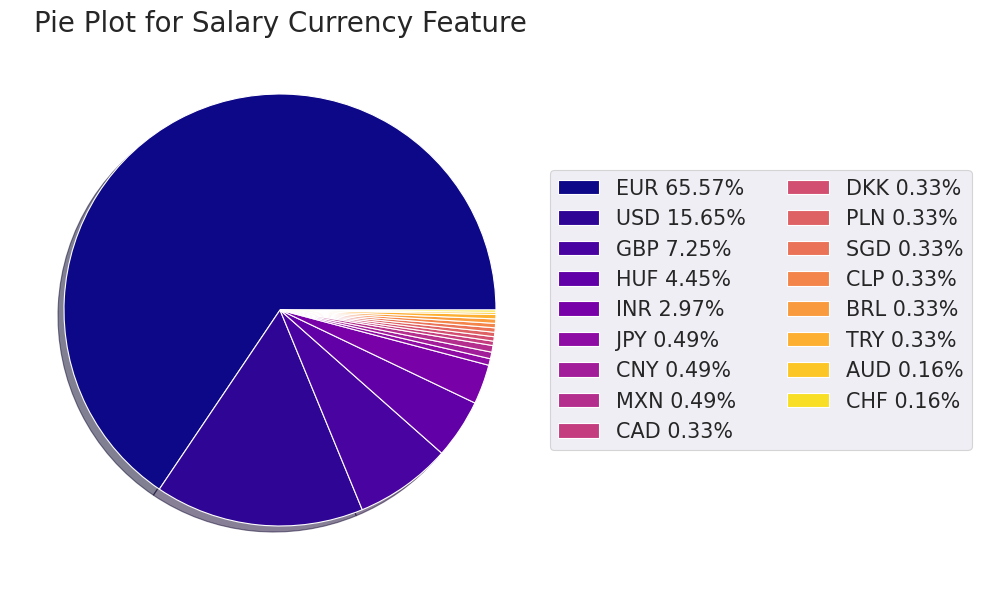

In [25]:
fig = plt.figure(figsize=(8, 6), dpi = 100)
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])
theme = plt.get_cmap('plasma')
axes.set_prop_cycle("color", [theme(1. * i / len(salaries_df["salary_currency"].unique()))
                             for i in range(len(salaries_df["salary_currency"].unique()))])
wedges, texts, autotexts = plt.pie(salaries_df["salary_currency"].value_counts(), labels=salaries_df["salary_currency"].unique(), shadow=True, startangle=0, autopct='%1.2f%%', textprops={"color": "white", "alpha": 0})
plt.legend(loc="right", bbox_to_anchor=[1, 0, 0.8, 1], ncol=2, labels=[f"{x[0].get_text()} {x[1].get_text()}" for x in zip(texts, autotexts)])
axes.set_title("Pie Plot for Salary Currency Feature", fontdict={"fontsize": 20})
plt.show()

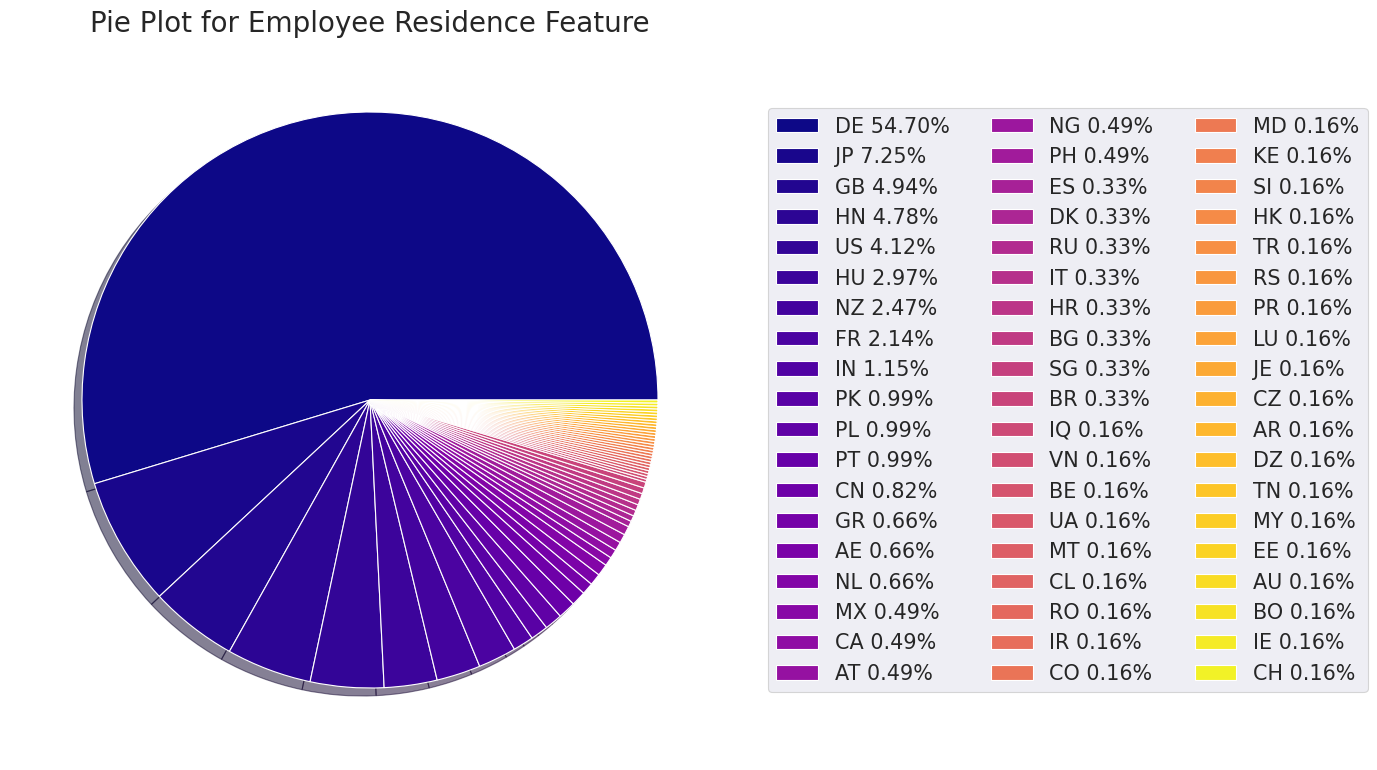

In [26]:
fig = plt.figure(figsize=(10, 8), dpi = 100)
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])
theme = plt.get_cmap('plasma')
axes.set_prop_cycle("color", [theme(1. * i / len(salaries_df["employee_residence"].unique()))
                             for i in range(len(salaries_df["employee_residence"].unique()))])
wedges, texts, autotexts = plt.pie(salaries_df["employee_residence"].value_counts(), labels=salaries_df["employee_residence"].unique(), shadow=True, startangle=0, autopct='%1.2f%%', textprops={"color": "white", "alpha": 0})
plt.legend(loc="right", bbox_to_anchor=[1, 0, 0.9, 1], ncol=3, labels=[f"{x[0].get_text()} {x[1].get_text()}" for x in zip(texts, autotexts)])
axes.set_title("Pie Plot for Employee Residence Feature", fontdict={"fontsize": 20})
plt.show()

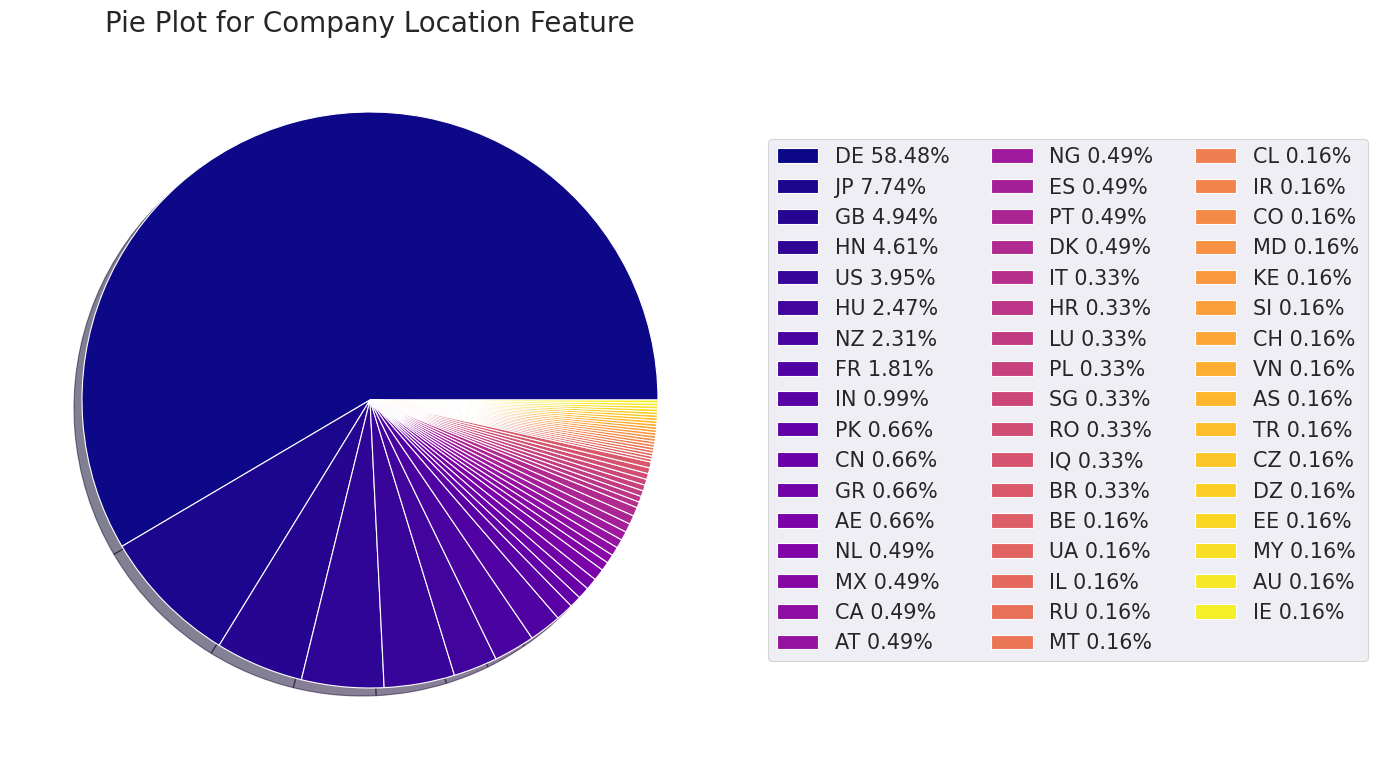

In [27]:
fig = plt.figure(figsize=(10, 8), dpi = 100)
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])
theme = plt.get_cmap('plasma')
axes.set_prop_cycle("color", [theme(1. * i / len(salaries_df["company_location"].unique()))
                             for i in range(len(salaries_df["company_location"].unique()))])
wedges, texts, autotexts = plt.pie(salaries_df["company_location"].value_counts(), labels=salaries_df["company_location"].unique(), shadow=True, startangle=0, autopct='%1.2f%%', textprops={"color": "white", "alpha": 0})
plt.legend(loc="right", bbox_to_anchor=[1, 0, 0.9, 1], ncol=3, labels=[f"{x[0].get_text()} {x[1].get_text()}" for x in zip(texts, autotexts)])
axes.set_title("Pie Plot for Company Location Feature", fontdict={"fontsize": 20})
plt.show()

**Analisis Bivariante**

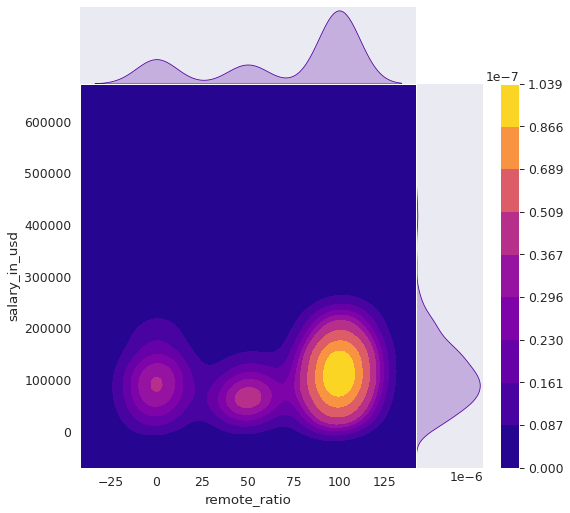

In [28]:
sns.set_context("paper", font_scale=1.4)
jointplot = sns.jointplot(y="salary_in_usd", x="remote_ratio", data=salaries_df, kind="kde", space=0, fill=True, thresh=0, cmap='plasma', cbar=True)
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)
pos_joint_ax = jointplot.ax_joint.get_position()
pos_marg_x_ax = jointplot.ax_marg_x.get_position()
jointplot.ax_joint.set_position([pos_joint_ax.x0, pos_joint_ax.y0, pos_marg_x_ax.width, pos_joint_ax.height])
jointplot.fig.axes[-1].set_position([.83, pos_joint_ax.y0, .07, pos_joint_ax.height])
jointplot.fig.set_size_inches(8, 8)
plt.show()

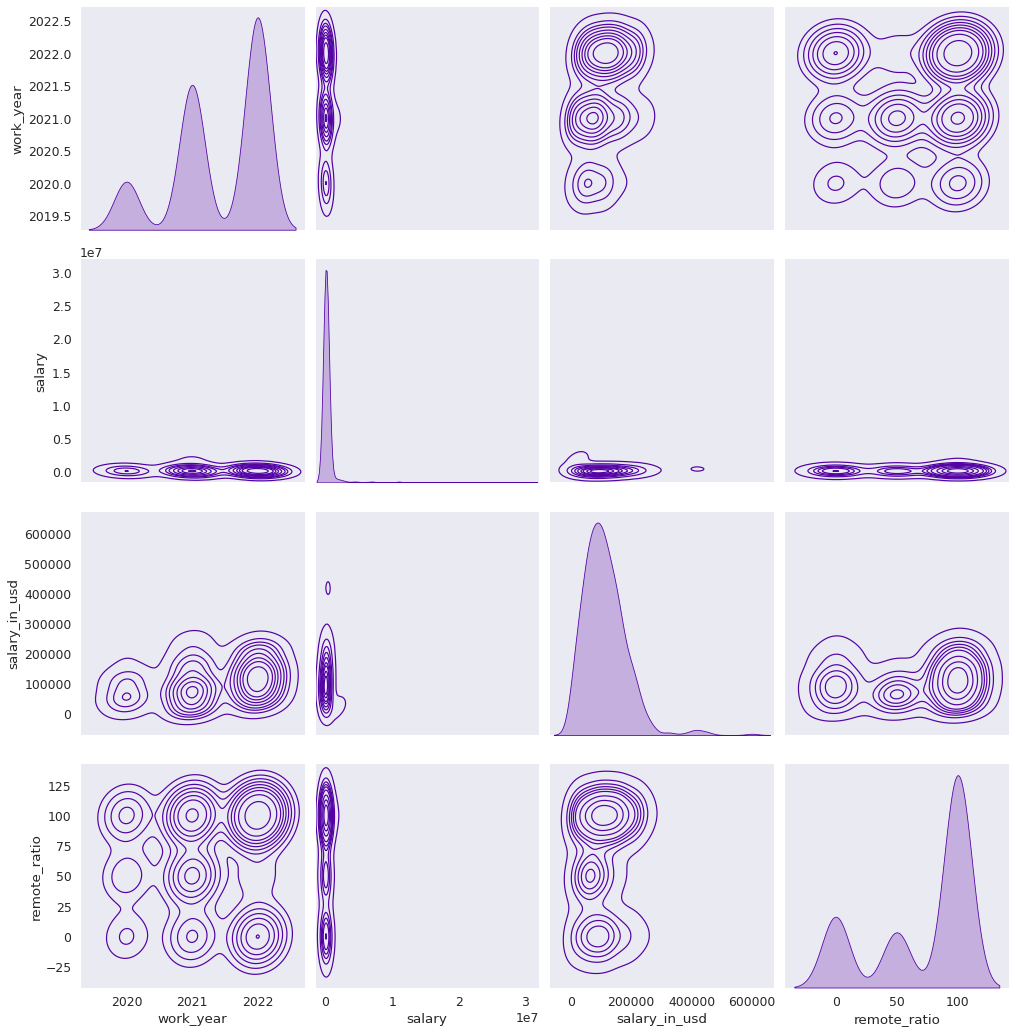

In [29]:
pairplot = sns.pairplot(data=salaries_df, kind="kde")
pairplot.fig.set_size_inches(15, 15)
plt.show()

**Analisis Bivariante Categorico**

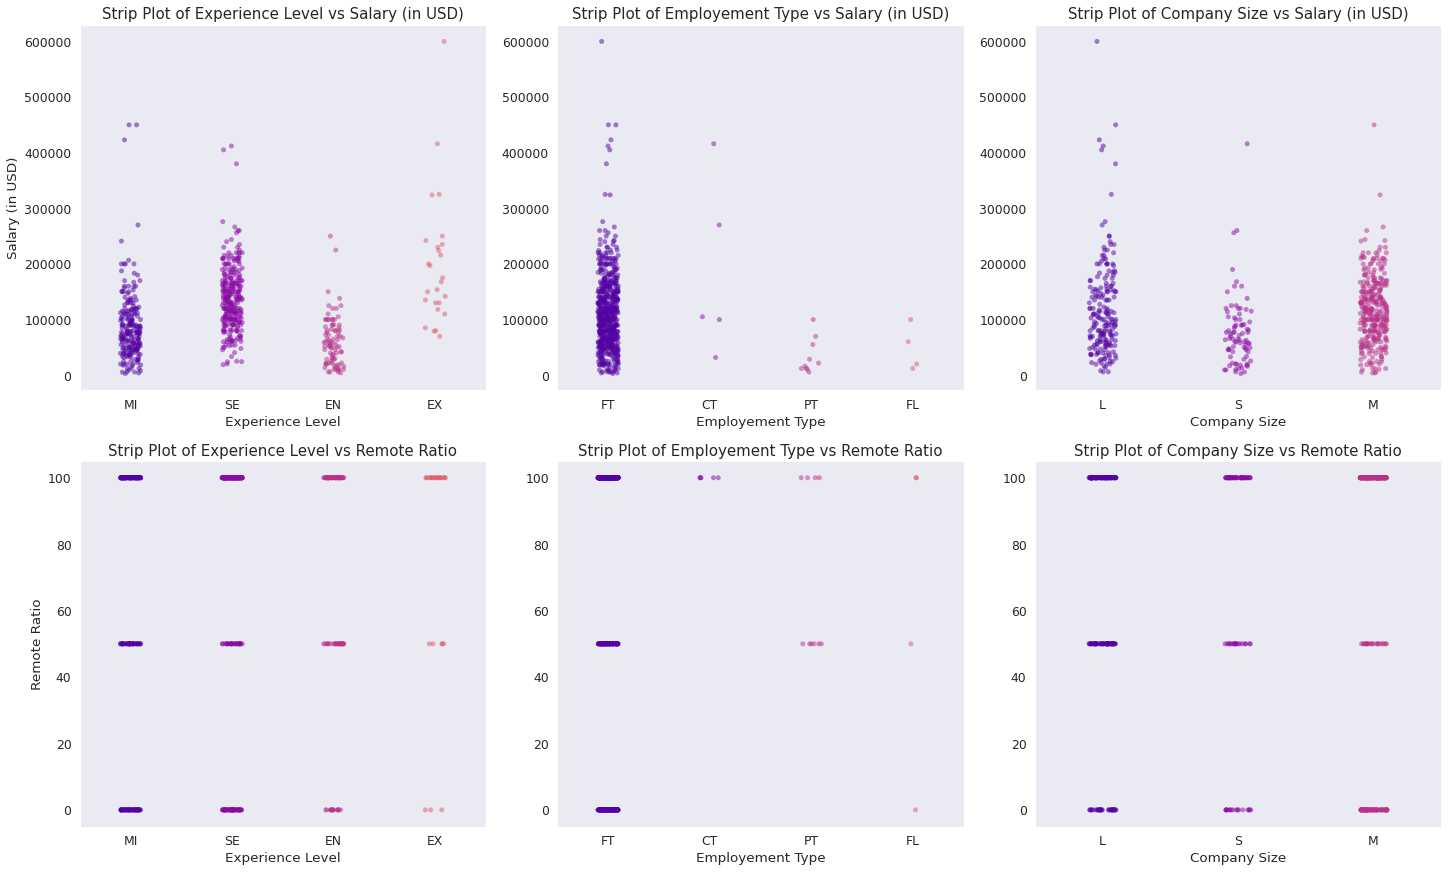

In [30]:
def strip_plot(categorical_variables, categorical_actual_value, numerical_variables, numerical_actual_value, nrow, ncol):
    fig, axes = plt.subplots(nrow, ncol, figsize=(20, 12), constrained_layout=True)
    for i in range(nrow):
        for j in range(ncol):
            x = j
            y = i
            sns.stripplot(x=categorical_variables[x], y=numerical_variables[y], data=salaries_df, ax=axes[i][j], alpha = 0.5)
            axes[i][j].set_xlabel(categorical_actual_value[x])
            axes[i][j].set_ylabel(numerical_actual_value[y] if j == 0 else "")
            axes[i][j].set_title(f"Strip Plot of {categorical_actual_value[x]} vs {numerical_actual_value[y]}", fontdict={"fontsize": 15})

categorical_variables = ["experience_level", "employment_type", "company_size"]
numerical_variables = ["salary_in_usd", "remote_ratio"]
strip_plot(categorical_variables = categorical_variables,
                categorical_actual_value = ["Experience Level", "Employement Type", "Company Size"],
                numerical_variables = numerical_variables,
                numerical_actual_value = ["Salary (in USD)", "Remote Ratio"],
                nrow = len(numerical_variables),
                ncol = len(categorical_variables))

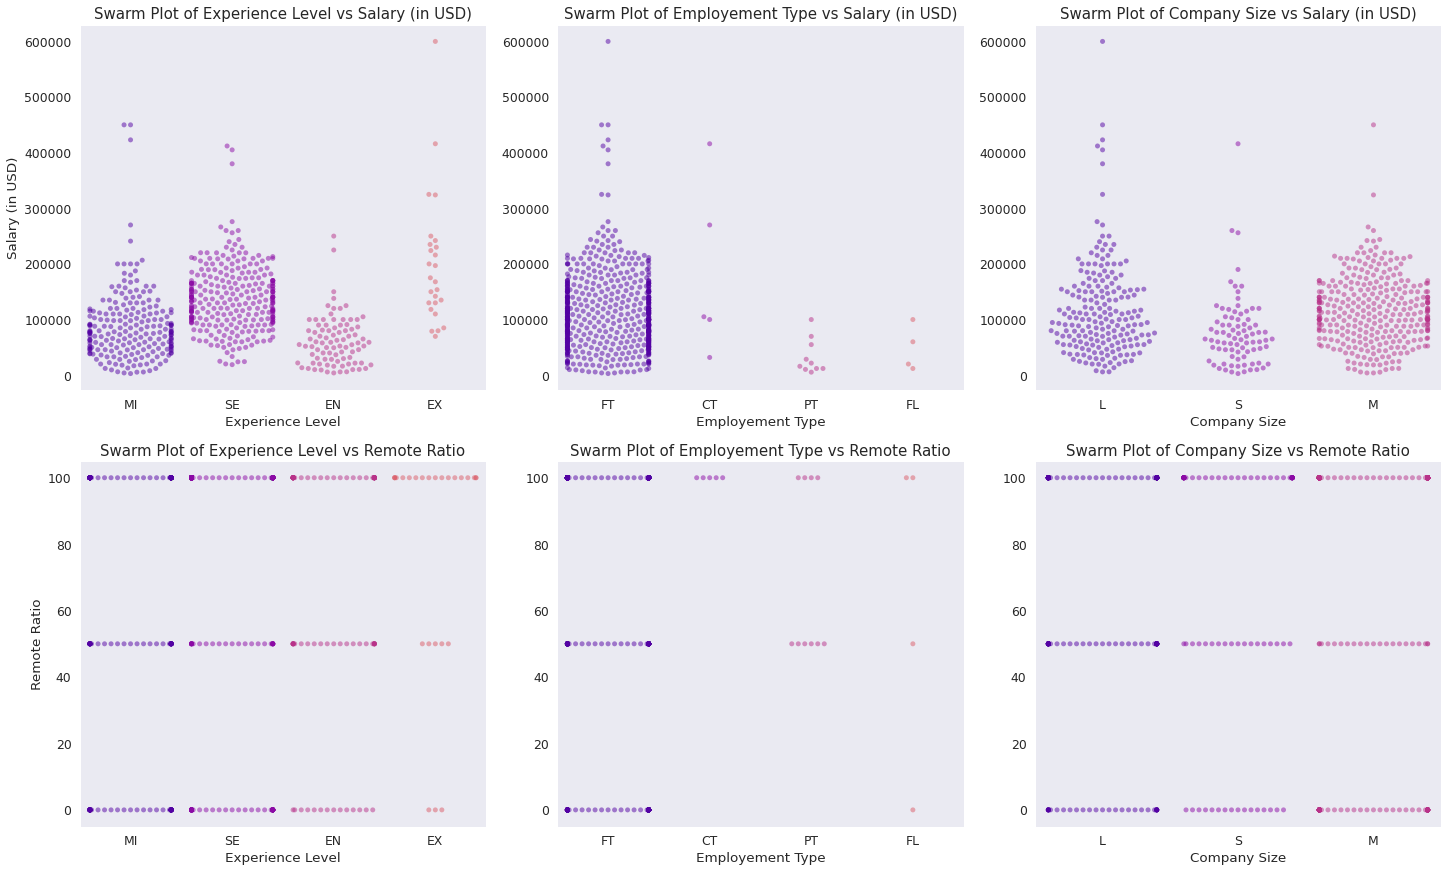

In [31]:

def swarm_plot(categorical_variables, categorical_actual_value, numerical_variables, numerical_actual_value, nrow, ncol):
    fig, axes = plt.subplots(nrow, ncol, figsize=(20, 12), constrained_layout=True)
    for i in range(nrow):
        for j in range(ncol):
            x = j
            y = i
            sns.swarmplot(x=categorical_variables[x], y=numerical_variables[y], data=salaries_df, ax=axes[i][j], alpha=0.5)
            axes[i][j].set_xlabel(categorical_actual_value[x])
            axes[i][j].set_ylabel(numerical_actual_value[y] if j == 0 else "")
            axes[i][j].set_title(f"Swarm Plot of {categorical_actual_value[x]} vs {numerical_actual_value[y]}", fontdict={"fontsize": 15})

categorical_variables = ["experience_level", "employment_type", "company_size"]
numerical_variables = ["salary_in_usd", "remote_ratio"]
swarm_plot(categorical_variables = categorical_variables,
                categorical_actual_value = ["Experience Level", "Employement Type", "Company Size"],
                numerical_variables = numerical_variables,
                numerical_actual_value = ["Salary (in USD)", "Remote Ratio"],
                nrow = len(numerical_variables),
                ncol = len(categorical_variables))

**Analisis multivariante**

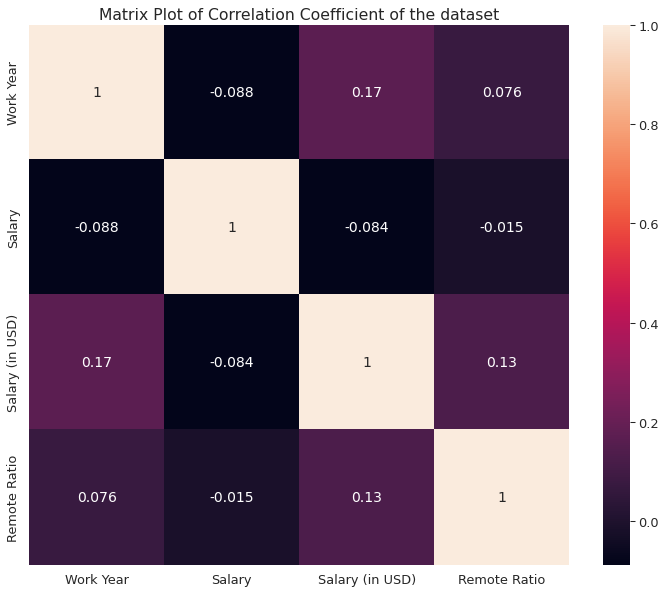

In [32]:
def plot_heatmap():
    corr_df = salaries_df.corr()
    fig = plt.figure(figsize=(10, 8), dpi = 75)
    axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])
    tick_values = ["Work Year", "Salary", "Salary (in USD)", "Remote Ratio"]
    sns.heatmap(corr_df, ax=axes, annot=True, xticklabels = tick_values, yticklabels = tick_values)
    axes.set_title("Matrix Plot of Correlation Coefficient of the dataset", fontdict={"fontsize": 15})
    plt.show()
plot_heatmap()

**Conclusion del mapa de calor.**

1. El salario y el remote ratio tienen una relacion positiva. Es evidente ya que esto indicaria el valor del salario vs full time, freelancer entre otras categorias del dataframe.

**Conclusion General.**

1. El conjunto de datos tiene un sesgo hacia los trabajos de nivel medio.
2. La relacion entre salario y distancia ratio es positiva, esto se puede observar con detalle en el sawrm_plot. Los salarios para empresas medianas son de 100.000 a 300.000 USD. Aumenta hasta 300.000 USD anuales para perfiles con experiencia senior.
Para perfiles junior se mantiene entre 0 +- 200.000 USD.